# Machine Learning Engineer - LuizaLabs Desafio

In [ ]:
# import de pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import joblib
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import classification_report


In [182]:
# definição de variváveis
train_path = '../data/challenge_train.csv'
test_path = '../data/challenge_test.csv'

target = 'strategy'

In [183]:
# coleta dos dados
df_train = pd.read_csv(train_path, sep = ';')
df_train.drop(columns='id', inplace=True)

df_test = pd.read_csv(test_path, sep = ';')
df_test.drop(columns='id', inplace=True)

## EDA

In [184]:
# visualizar do dataset de treinmento
df_train

,name,mana,attack,health,type,god,strategy
0,Firewine,5,0,0,spell,nature,early
1,Leyhoard Hatchling,10,2,1,creature,magic,late
2,Aetherfuel Alchemist,6,4,4,creature,neutral,late
3,Millenium Matryoshka,4,2,2,creature,neutral,late
4,Poison Peddler,4,1,3,creature,neutral,late
...,...,...,...,...,...,...,...
783,Living Container,2,1,1,creature,death,early
784,Famished Ghoul,4,4,4,creature,death,late
785,The Iron Horse,7,5,5,creature,neutral,late
786,Golem Excavator,7,6,7,creature,neutral,late


In [185]:
# vizualizar resumo de informações sobre o dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      788 non-null    object
 1   mana      788 non-null    int64 
 2   attack    788 non-null    int64 
 3   health    788 non-null    int64 
 4   type      788 non-null    object
 5   god       788 non-null    object
 6   strategy  788 non-null    object
dtypes: int64(3), object(4)
memory usage: 43.2+ KB
None


In [186]:
# Seleção de features numéricas
numerical_data = df_train.select_dtypes(include='number')

# Organizar em lista as features de numerical_data
numerical_features = numerical_data.columns.tolist()

# Vizualizar features numéricas
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['mana', 'attack', 'health']


In [ ]:
# Seleção de features de categorias/qualitativas
categorical_data = df_train.select_dtypes(include= 'object')

# Remoção da feature "name"
categorical_data = categorical_data.drop(columns= 'name')

#  Organizar em lista as features de categorical_data
categorical_features = categorical_data.columns.tolist()

# Vizualizar features categórias/qualitativas
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 3 categorical features: 

['type', 'god', 'strategy']


### Análise de features numéricas

In [188]:
# Vizualizar descrição
numerical_data.describe().T.to_html("./EDA Results/numerical_features_describe.html")
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mana,788.0,3.572335,2.190100,0.0,2.0,3.0,5.0,16.0
attack,788.0,2.140863,2.215047,0.0,0.0,2.0,3.0,13.0
health,788.0,2.583756,2.455053,0.0,0.0,2.0,4.0,17.0


In [189]:
# Confirmação de valores nulos
numerical_data.isnull().sum()

mana      0
attack    0
health    0
dtype: int64

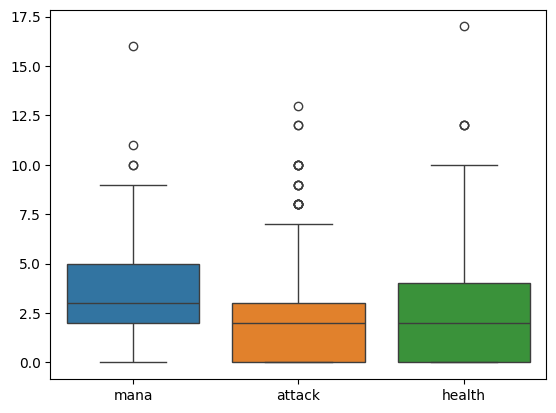

In [190]:
# Gráfico em Boxplot
plot = sns.boxplot(numerical_data)
plt.show()
plot.figure.savefig("./EDA Results/numerical_features_boxplot.png")

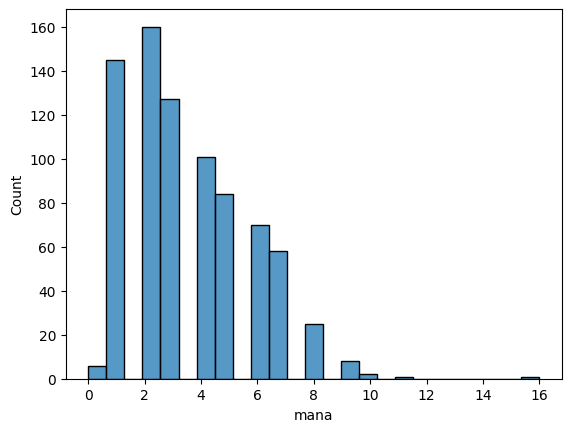

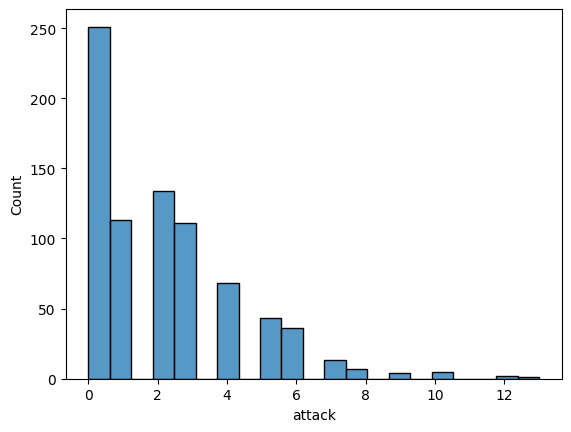

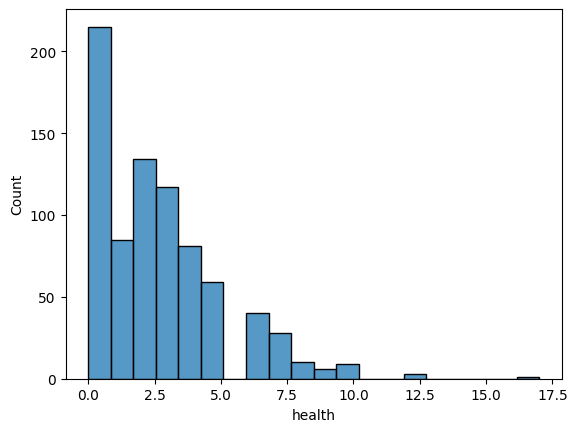

In [191]:
# Gráfico de Histograma
for feature in numerical_features:
    plot = sns.histplot(numerical_data[feature])
    plt.show()
    plot.figure.savefig(f"./EDA Results/numerical_features_histogram_{feature}.png")


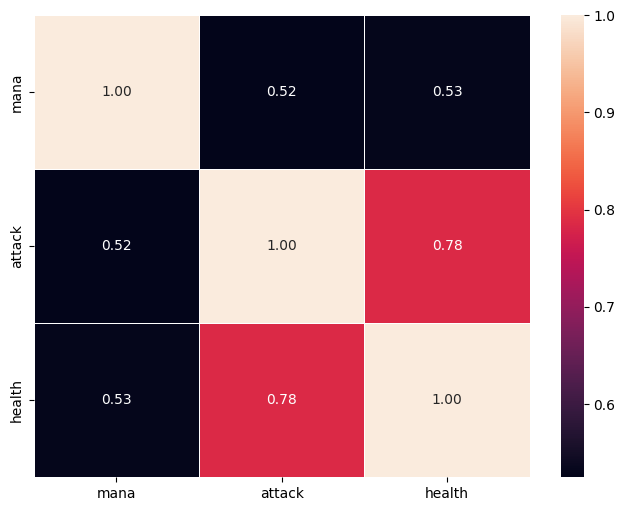

In [192]:
# Correlação entre features
plt.figure(figsize=(8,6))
plot = sns.heatmap(numerical_data.corr(method = 'pearson'),annot=True,fmt=".2f", linewidth=.5)
plt.show()
plot.figure.savefig(f"./EDA Results/numerical_feature_correlation.png")


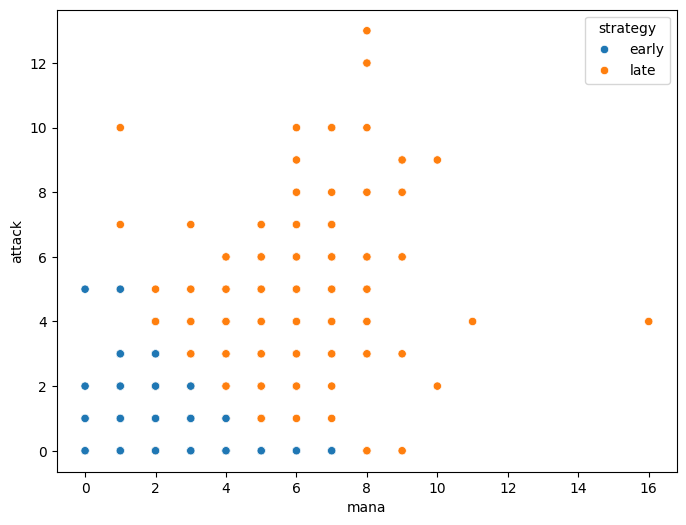

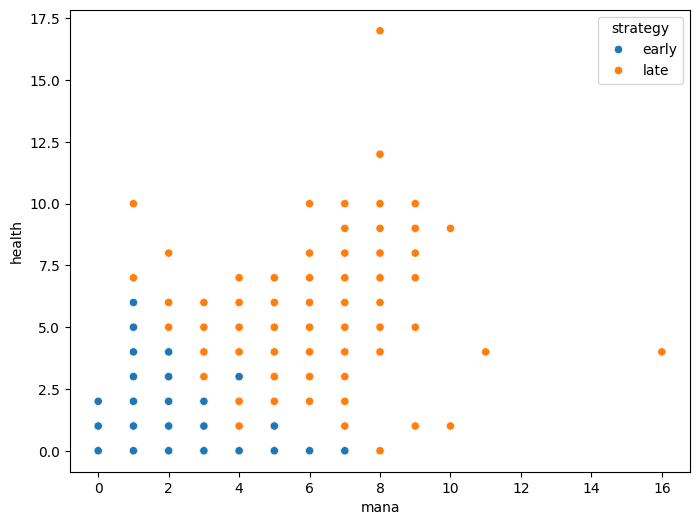

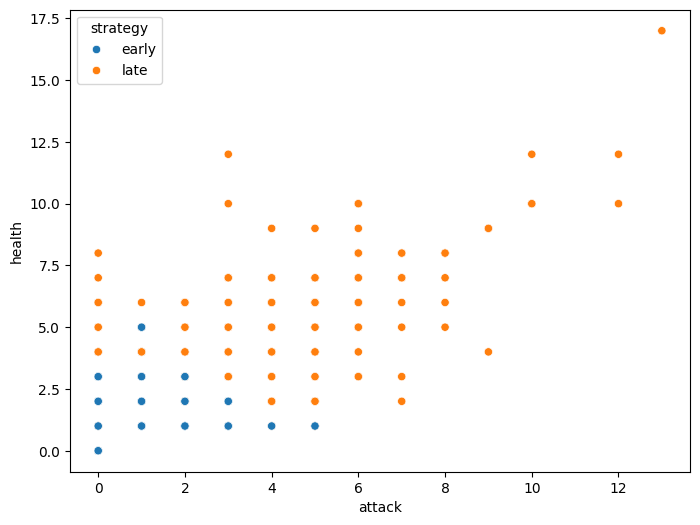

In [193]:
# Vizualização de disperção entre features e segmentação pelo target
for feature1, feature2 in list(itertools.combinations(numerical_data, 2)):
    plt.figure(figsize=(8,6))
    plot = sns.scatterplot(numerical_data,
            x = feature1,
            y = feature2 ,
            hue = df_train[target]
            )
    plt.show()
    plot.figure.savefig(f"./EDA Results/numerical_features_scatter_{feature1}_{feature2}.png")


### Análise de features de categorias/qualitativas

In [194]:
# Vizualizar descrição
categorical_data.describe(include='object').T.to_html("./EDA Results/categorical_features_describe.html")
categorical_data.describe(include='object').T

,count,unique,top,freq
type,788,4,creature,526
god,788,7,neutral,276
strategy,788,2,early,432


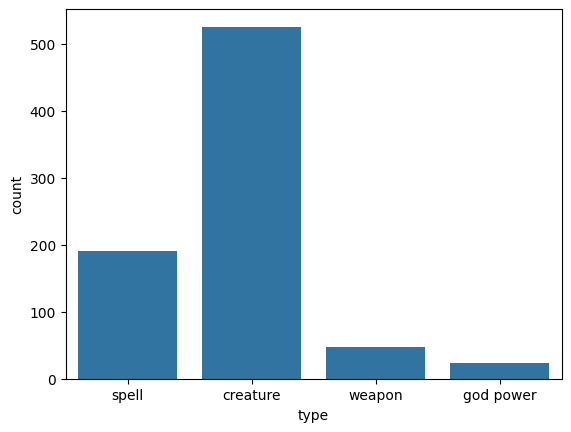

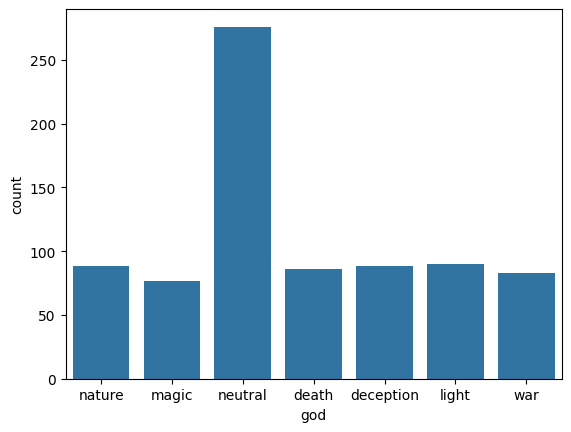

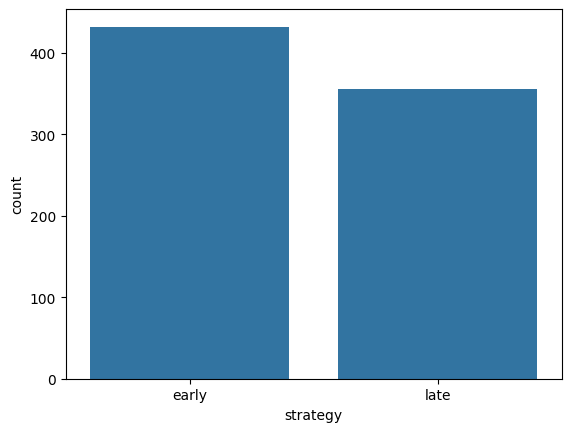

In [195]:
# Vizualiação de frequência de categorias em cada feature categórica
for col in categorical_features:
    plot = sns.countplot(categorical_data,
                  x = col)
    plt.show()
    plot.figure.savefig(f"./EDA Results/categorical_features_frequency_{col}.png")

## Pipeline de tratamento de features

In [ ]:
# Criar OneHotEncoder de categorical features (Exluindo o target - strategy)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(categorical_data.drop(columns='strategy'))

# save OneHotEncoder
joblib.dump(enc, "../src/models/OneHotEncoder_model.pkl") 

['../src/models/OneHotEncoder_model.pkl']

In [197]:
# Remover o target - strategy, da categorical features
categorical_features.remove(target)

In [198]:
# load
enc = joblib.load("../src/models/OneHotEncoder_model.pkl") 
enc.get_feature_names_out(categorical_features)

array(['type_creature', 'type_god power', 'type_spell', 'type_weapon',
       'god_death', 'god_deception', 'god_light', 'god_magic',
       'god_nature', 'god_neutral', 'god_war'], dtype=object)

In [199]:
# Organizar features numericas com Categorias tranformadas pelo Encoder
X = pd.concat([numerical_data, pd.DataFrame(enc.transform(categorical_data.drop(columns='strategy')).toarray(), columns=enc.get_feature_names_out(categorical_features))],
              axis = 1)
X

,mana,attack,health,type_creature,type_god power,type_spell,type_weapon,god_death,god_deception,god_light,god_magic,god_nature,god_neutral,god_war
0,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
784,4,4,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
785,7,5,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
786,7,6,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [200]:
# Selecionar a feature target - strategy
y = df_train[target]
y

0      early
1       late
2       late
3       late
4       late
       ...  
783    early
784     late
785     late
786     late
787    early
Name: strategy, Length: 788, dtype: object

In [201]:
# Realizar train test spli - para avaliação do treinamento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(y_train.shape)
print(y_test.shape)

(527,)
(261,)


In [202]:
# Realizar treinamento do Modelo SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
joblib.dump(clf, "../src/models/Classification_model.pkl") 


['../src/models/Classification_model.pkl']

In [203]:
# Report de avalição com dados de treinamento
report_train_data = classification_report(y_train, clf.predict(X_train), output_dict=True)
report_train_data = pd.DataFrame(data = report_train_data)
report_train_data.to_html('./Evaluation_report_traindata_SVC.html')
report_train_data

,early,late,accuracy,macro avg,weighted avg
precision,0.982993,1.000000,0.990512,0.991497,0.990674
recall,1.000000,0.978992,0.990512,0.989496,0.990512
f1-score,0.991424,0.989384,0.990512,0.990404,0.990503
support,289.000000,238.000000,0.990512,527.000000,527.000000


In [204]:
# Report de avalição com dados de teste
report_test_data = classification_report(y_test, clf.predict(X_test), output_dict=True)
report_test_data = pd.DataFrame(data = report_test_data)
report_test_data.to_html('./Evaluation_report_testdata_SVC.html')
report_test_data

,early,late,accuracy,macro avg,weighted avg
precision,0.972603,0.991304,0.980843,0.981954,0.981058
recall,0.993007,0.966102,0.980843,0.979554,0.980843
f1-score,0.982699,0.978541,0.980843,0.980620,0.980819
support,143.000000,118.000000,0.980843,261.000000,261.000000
